# Namen!!

In [1]:
# Einladen der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gsw

# 1. Cap Verden (Meteor)

In [2]:
# Daten einlesen: 
met_ctd = xr.open_dataset('../data/met_105_1_ctd_009.nc', decode_times=False)
print('Dataset met_ctd\n', met_ctd)
print('\nVariablen met_ctd\n', met_ctd.data_vars)

Dataset met_ctd
 <xarray.Dataset> Size: 33kB
Dimensions:       (TIME: 1, LATITUDE: 1, LONGITUDE: 1, PRES: 603)
Coordinates:
  * TIME          (TIME) float64 8B 2.345e+04
  * LATITUDE      (LATITUDE) float64 8B 19.03
  * LONGITUDE     (LONGITUDE) float64 8B -24.77
  * PRES          (PRES) float64 5kB 6.0 7.0 8.0 9.0 ... 605.0 606.0 607.0 608.0
Data variables: (12/14)
    TIME_QC       (TIME) int8 1B ...
    LATITUDE_QC   (LATITUDE) int8 1B ...
    LONGITUDE_QC  (LONGITUDE) int8 1B ...
    PRES_QC       (PRES) int8 603B ...
    TEMP          (PRES) float64 5kB ...
    TEMP_QC       (PRES) int8 603B ...
    ...            ...
    DOX2          (PRES) float64 5kB ...
    DOX2_QC       (PRES) int8 603B ...
    TURB          (PRES) float64 5kB ...
    TURB_QC       (PRES) int8 603B ...
    FLU2          (PRES) float64 5kB ...
    FLU2_QC       (PRES) int8 603B ...
Attributes: (12/81)
    Conventions:                                 CF-1.6, OceanSites Manual-1....
    netcdf_version:         

Koordinaten
- TIME – Zeit (Tage)
- LATITUDE – Breitengrad
- LONGITUDE – Längengrad
- PRES – Druck (dbar)

Variablen
- QC – quality control
- TEMP – in-situ Temperatur (°C)
- PSAL – praktischer Salzgehalt (1e-3)
- DOX – im Wasser gelöster Suaerstoff (μmol/kg)
- TURB – Trübung des Wassers (NTU: Nephelometric Turbidity Unit (Nephelometrischer Trübungswert))
- FLU – Massenkonzentration von Chlorophyll-a im Wasser (1e-6 g/l)

In [3]:
# Kordinaten einlesen
m_lon = met_ctd['LONGITUDE'][:]   # lon = -24.77
m_lat = met_ctd ['LATITUDE'][:]   # lat = 19.03
m_press = met_ctd['PRES'][:]      # 6 bis 608 dbar

# Variablen
m_temp = met_ctd['TEMP'][:]       # in situ temperature
m_psal = met_ctd['PSAL'][:]       # sea water salinity
m_oxy = met_ctd['DOX2'][:]        # dissolved oxygen

In [4]:
m_abs_sal = gsw.SA_from_SP(m_psal, m_press, m_lon, m_lat)           # absoluter Salzgehalt
m_pot_temp = gsw.pt_from_t(m_abs_sal, m_temp, m_press, p_ref = 0)   # potentielle Temperatur
m_cons_temp = gsw.CT_from_t(m_abs_sal, m_temp, m_press)              # konservative Temperatur (für potentielle Dichteanomalie nötig)
m_pot_dens_anom = gsw.sigma0(m_abs_sal, m_cons_temp)                 # potentielle Dichteanomalie, Referenzdruck 0 dbar
m_depth = gsw.z_from_p(m_press, m_lat)                               # Tiefe

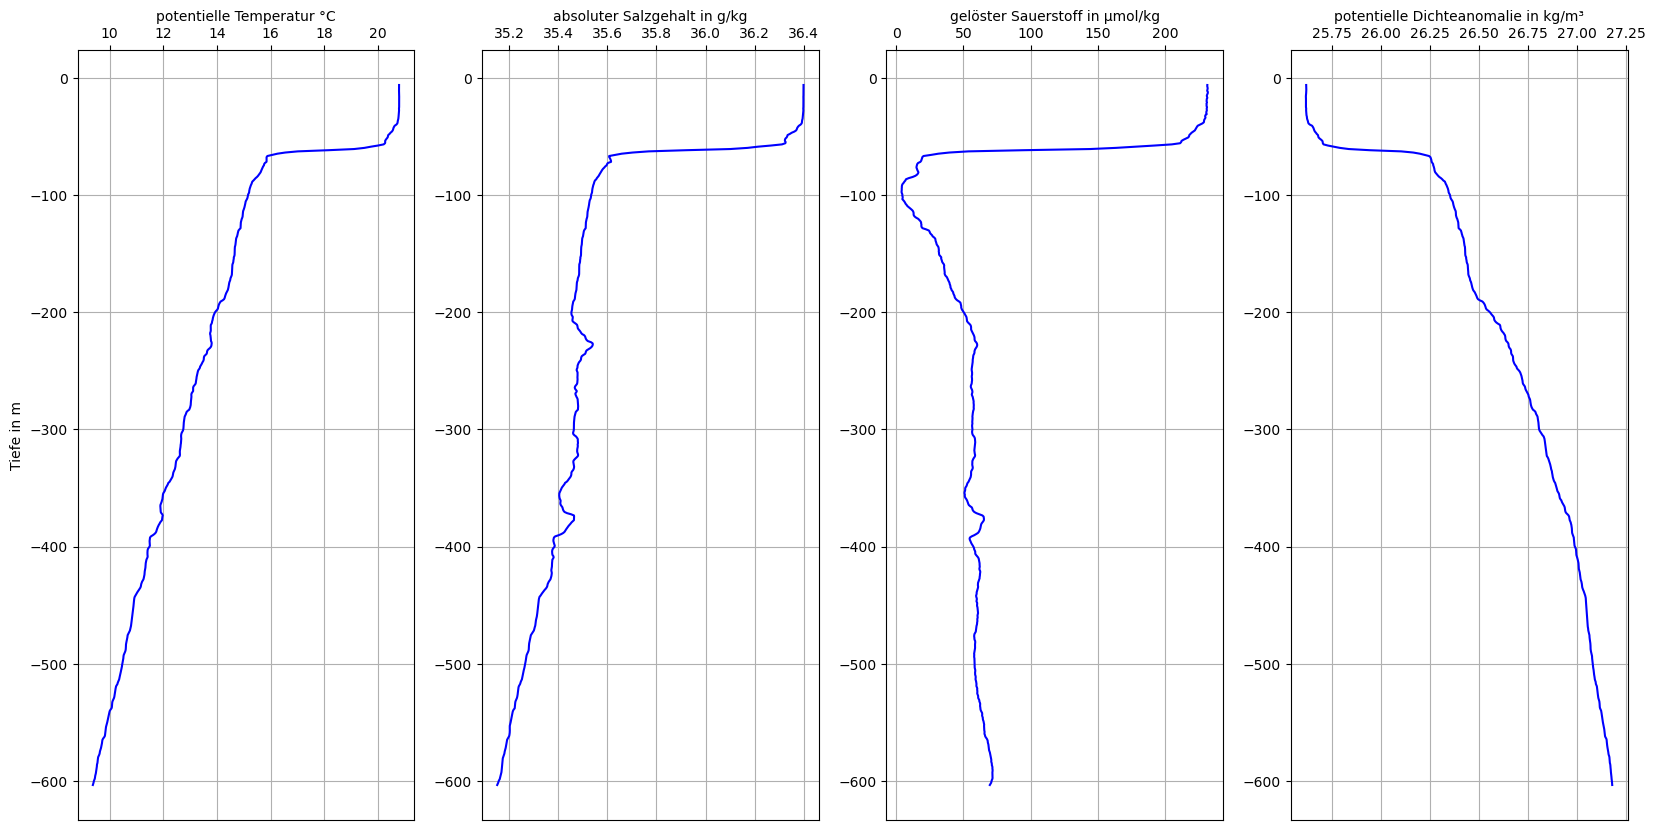

In [5]:
fig, ax = plt.subplots(1,4,figsize=(20,10))
# potentielle Temperatur
ax[0].plot(m_pot_temp[:,0,0], m_depth,'b-')
ax[0].set_xlabel('potentielle Temperatur °C')
ax[0].xaxis.set_label_position('top') 
ax[0].set_ylabel('Tiefe in m')
ax[0].grid()
ax[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

# absoluter Salzgehalt
ax[1].plot(m_psal, m_depth, 'b-')
ax[1].set_xlabel('absoluter Salzgehalt in g/kg')
ax[1].xaxis.set_label_position('top') 
ax[1].grid()
ax[1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

# gelöster Sauerstoff
ax[2].plot(m_oxy, m_depth, 'b-')
ax[2].set_xlabel('gelöster Sauerstoff in μmol/kg')
ax[2].xaxis.set_label_position('top')
ax[2].grid()
ax[2].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

# potentielle Dichteanomalie
ax[3].plot(m_pot_dens_anom[:,0,0], m_depth, 'b-')
ax[3].set_xlabel('potentielle Dichteanomalie in kg/m³')
ax[3].xaxis.set_label_position('top')
ax[3].grid()
ax[3].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

# 2. Philippinengraben (Willebrord Snellius)

In [6]:
# Daten einlesen: 
phil_ts = xr.open_dataset('../data/CTD_Philippinengraben.nc', decode_times=False)
print('Dataset phil_ts\n', phil_ts)

Dataset phil_ts
 <xarray.Dataset> Size: 272B
Dimensions:      (depth: 11)
Coordinates:
  * depth        (depth) float32 44B 1.6e+03 1.8e+03 2e+03 ... 8e+03 9e+03 1e+04
Data variables:
    longitude    float32 4B ...
    latitude     float32 4B ...
    pressure     (depth) float32 44B ...
    temperature  (depth) float64 88B ...
    salinity     (depth) float64 88B ...


In [7]:
# Kordinaten einlesen
p_lon = phil_ts['longitude']
p_lat = phil_ts ['latitude']
p_press = phil_ts['pressure'][:]
p_depth = phil_ts['depth'][:]
print(p_depth[:])

# Variablen
p_temp = phil_ts['temperature'][:]       # in situ temperature
p_sal = phil_ts['salinity'][:]       # practical salinity

<xarray.DataArray 'depth' (depth: 11)> Size: 44B
array([ 1600.,  1800.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,
        9000., 10000.], dtype=float32)
Coordinates:
  * depth    (depth) float32 44B 1.6e+03 1.8e+03 2e+03 ... 8e+03 9e+03 1e+04
Attributes:
    units:          meter
    axis:           Z
    standard_name:  depth


In [8]:
p_abs_sal = gsw.SA_from_SP(p_sal, p_press, p_lon, p_lat)            # absoluter Salzgehalt
p_pot_temp = gsw.pt_from_t(p_abs_sal, p_temp, p_press, p_ref = 0)   # potentielle Temperatur
p_cons_temp = gsw.CT_from_t(p_abs_sal, p_temp, p_press)             # konservative Temperatur

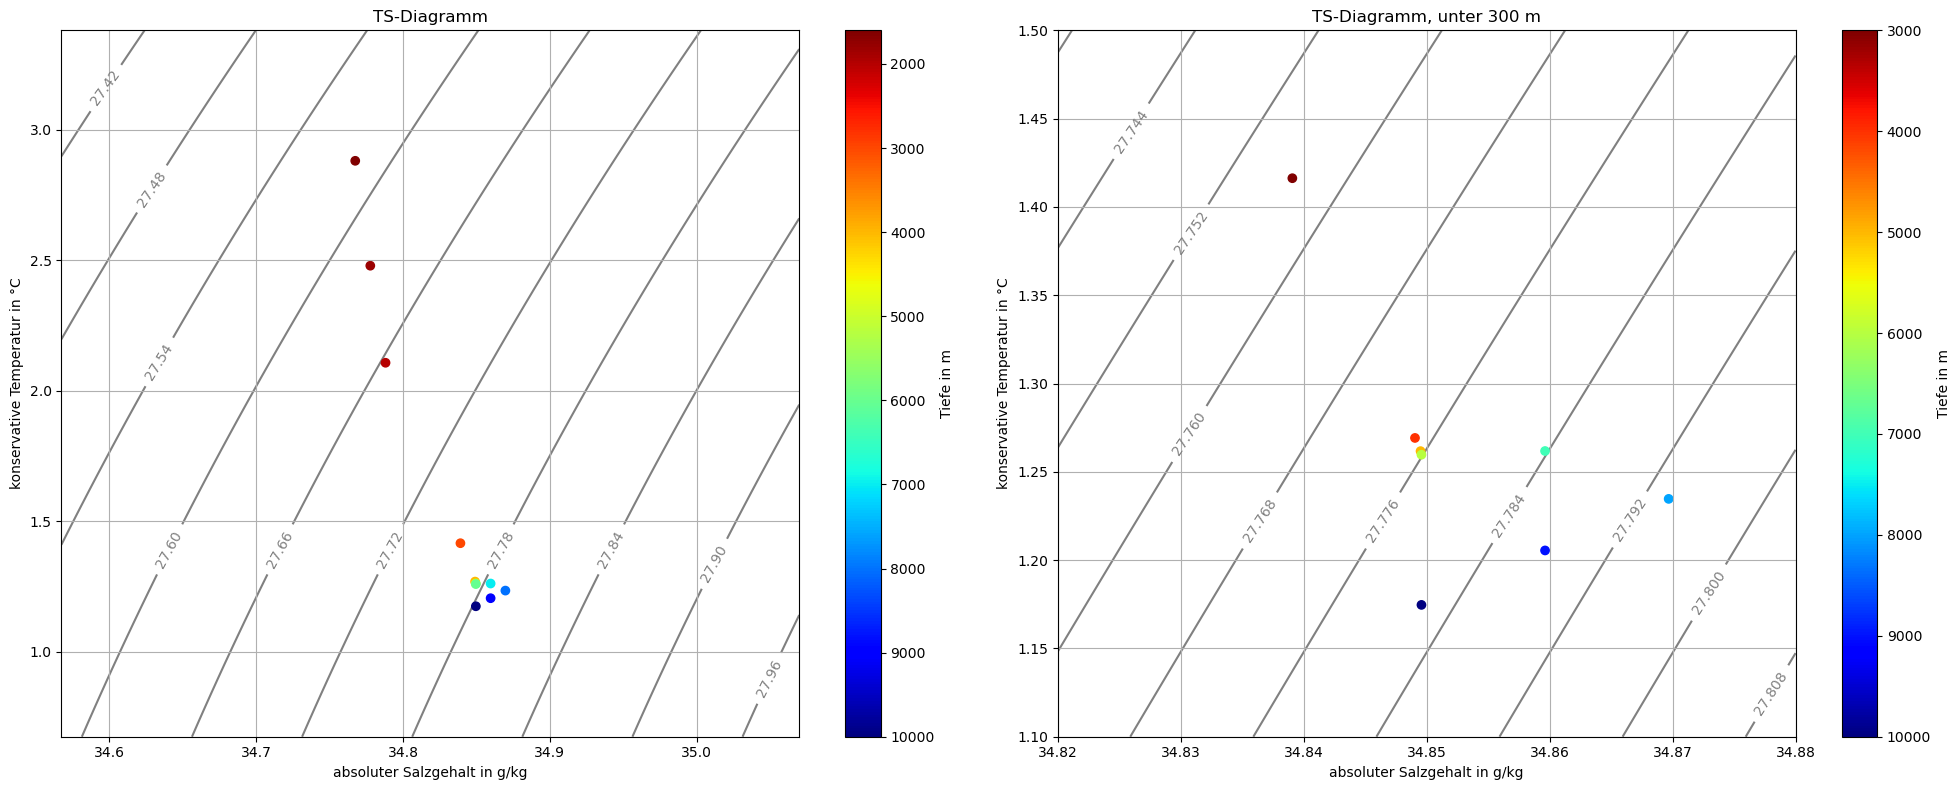

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(121)
# meshgrid für Isopyknen
ct_sig = np.linspace(np.nanmin(p_cons_temp)-0.5, np.nanmax(p_cons_temp)+0.5)
sa_sig = np.linspace(np.nanmin(p_abs_sal)-0.2, np.nanmax(p_abs_sal)+0.2)
CT_sig, SA_sig = np.meshgrid(ct_sig, sa_sig)
Pot_dens = gsw.sigma0(SA_sig,CT_sig)        # potentielle Dichteanomalie (auf meshgrid aus kons Temp & abs Sal)

plt.contour(SA_sig, CT_sig, Pot_dens, colors = 'grey', zorder=1, levels=10).clabel(fontsize = 10, colors = 'grey') # Konturlinien Isopyknen
plt.scatter(p_abs_sal, p_cons_temp, c=p_depth, cmap='jet_r')   # Verteilung der Messwerte

plt.grid()
cb = plt.colorbar()
cb.set_label(label="Tiefe in m")
cb.ax.invert_yaxis()

plt.xlabel("absoluter Salzgehalt in g/kg")
plt.ylabel("konservative Temperatur in °C")
plt.title("TS-Diagramm");

# Zoombereich: tiefer als 3000 m
plt.subplot(122)
# meshgrid für Isopyknen
ct_sig = np.linspace(1.1, 1.5)
sa_sig = np.linspace(34.83, 34.88)
CT_sig, SA_sig = np.meshgrid(ct_sig, sa_sig)
Pot_dens = gsw.sigma0(SA_sig,CT_sig)

plt.contour(SA_sig, CT_sig, Pot_dens, colors = 'grey', zorder=1, levels=10).clabel(fontsize = 10, colors = 'grey') # Konturlinien Isopyknen
plt.scatter(p_abs_sal[3:], p_cons_temp[3:], c=p_depth[3:], cmap='jet_r')   # Verteilung der Messwerte

plt.grid()
cb = plt.colorbar()
cb.set_label(label="Tiefe in m")
cb.ax.invert_yaxis()

plt.xlabel("absoluter Salzgehalt in g/kg")
plt.ylabel("konservative Temperatur in °C")
plt.title("TS-Diagramm, unter 3000 m");
plt.tight_layout()

- Mit zunehmender Tiefe nimmt die konvervative Temperatur ab, der absolute Salzgehalt nimmt zu
- In einer Tiefe unter 4000m verändert sich die Temperatur weniger, ebenso der Salzgehalt, dennoch ist ein kleiner Anstieg im Salzgehalt bis 1,23°C auf 34,87 g/kg festzustellen, in größerer Tiefe bei geringerer Temperatur nimmt der Salzgehalt wieder leicht  ab.

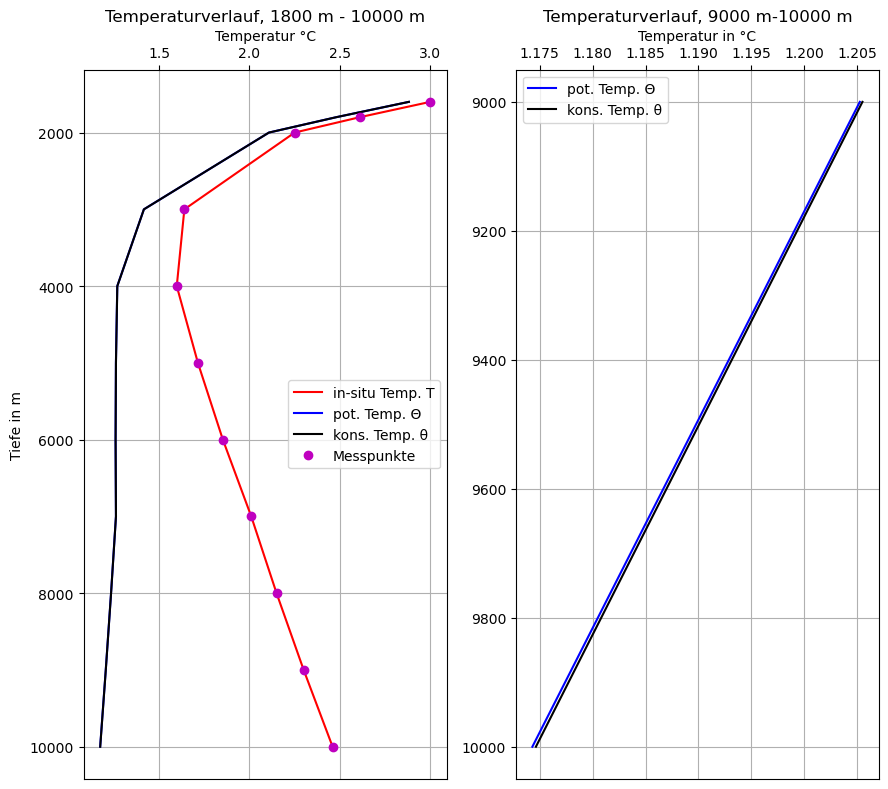

In [10]:
fig, ax = plt.subplots(1,2,figsize=(9,8))

# Temperatur
ax[0].plot(p_temp, p_depth,'r', label='in-situ Temp. T')
ax[0].plot(p_pot_temp, p_depth,'b', label='pot. Temp. Θ')
ax[0].plot(p_cons_temp, p_depth,'k', label='kons. Temp. θ')
ax[0].plot(p_temp, p_depth,'om', label='Messpunkte')
ax[0].set_xlabel('Temperatur °C')
ax[0].xaxis.set_label_position('top')
ax[0].set_ylabel('Tiefe in m')
ax[0].set_title('Temperaturverlauf, 1800 m - 10000 m')
ax[0].invert_yaxis()
ax[0].grid()
ax[0].legend()
ax[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

# Temperatur (9000m-10000m)
ax[1].plot(p_pot_temp[9:11], p_depth[9:11],'b', label='pot. Temp. Θ')
ax[1].plot(p_cons_temp[9:11], p_depth[9:11],'k', label='kons. Temp. θ')
ax[1].set_xlabel('Temperatur in °C')
ax[1].xaxis.set_label_position('top') 
ax[1].invert_yaxis()
ax[1].set_title('Temperaturverlauf, 9000 m-10000 m')
ax[1].grid()
ax[1].legend()
ax[1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

fig.tight_layout()

- bis 2000 m Tiefe sind sich alle drei Temperaturverläufe sehr ähnlich.
- ab ca. 4000 m steigt die in-situ Temperatur wieder an, aufgrund des zunehmenden Druckes
- potentielle und konservative Temperatur sind in geringen Tiefen praktisch identisch, auch zwischen den beiden letzten Messpunkten (9 000 - 10 000 m) unterscheiden sie sich kaum von einander.

In [11]:
p_pot_dens_0 = gsw.rho(p_abs_sal, p_cons_temp, 0)
p_pot_dens_6000 = gsw.rho(p_abs_sal, p_cons_temp, 6000)
p_pot_dens_10000 = gsw.rho(p_abs_sal, p_cons_temp, 10000)

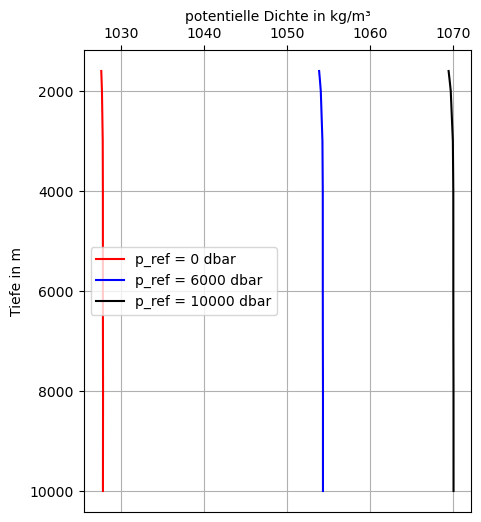

In [12]:
fig, ax = plt.subplots(1,1,figsize=(5,6))
ax.plot(p_pot_dens_0, p_depth,'r', label='p_ref = 0 dbar')
ax.plot(p_pot_dens_6000, p_depth,'b', label='p_ref = 6000 dbar')
ax.plot(p_pot_dens_10000, p_depth,'k', label='p_ref = 10000 dbar')
ax.set_xlabel('potentielle Dichte in kg/m³')
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Tiefe in m')
ax.invert_yaxis()
ax.grid()
ax.legend(loc = 'lower centre')
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

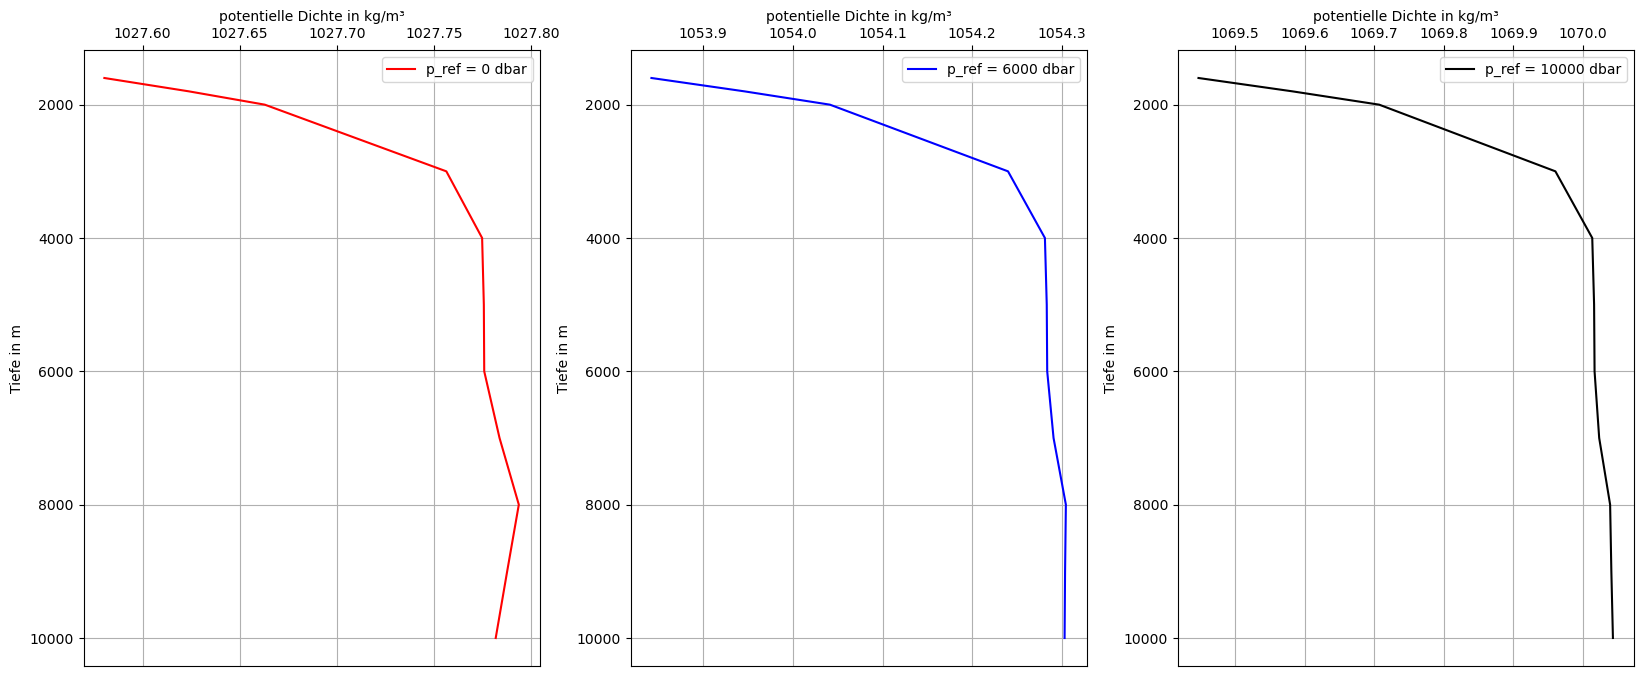

In [13]:
fig, ax = plt.subplots(1,3,figsize=(20,8))
#p_ref = 0 dbar
ax[0].plot(p_pot_dens_0, p_depth,'r', label='p_ref = 0 dbar')
ax[0].set_xlabel('potentielle Dichte in kg/m³')
ax[0].xaxis.set_label_position('top') 
ax[0].set_ylabel('Tiefe in m')
ax[0].invert_yaxis()
ax[0].grid()
ax[0].legend()
ax[0].get_xaxis().get_major_formatter().set_useOffset(False)
ax[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

#p_ref = 6000 dbar
ax[1].plot(p_pot_dens_6000, p_depth,'b', label='p_ref = 6000 dbar')
ax[1].set_xlabel('potentielle Dichte in kg/m³')
ax[1].xaxis.set_label_position('top')
ax[1].invert_yaxis()
ax[1].grid()
ax[1].legend()
ax[1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

# p_ref = 10000 dbar
ax[2].plot(p_pot_dens_10000, p_depth,'k', label='p_ref = 10000 dbar')
ax[2].set_xlabel('potentielle Dichte in kg/m³')
ax[2].xaxis.set_label_position('top')
ax[2].invert_yaxis()
ax[2].grid()
ax[2].legend()
ax[2].get_xaxis().get_major_formatter().set_useOffset(False)
ax[2].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

- Damit eine stabile Schichtung vorliegt, muss die potentielle Dichte mit geringerer Tiefe abnehmen. Nimmt die potentielle Dichte mit geringerer Tiefe zu, würde ein Wasserpaket mit geringerer Dichte weiter aufsteigen, bis es in stabile Schichtung gerät bzw. ein dichteres Wasserpaket würde sinken.
- p_ref = 0 dbar: zwischen 8000 m - 10000 m nimmt die potentielle Dichte mit abnehmender Tiefe zu, dort ist die Schichtung nach dem Modell eines Referenzdruckes an der Oberfläche also instabil.
- p_ref = 6 000 dbar: zwischen 8000 m - 10000 m nimmt die potentielle Dichte mit abnehmender Tiefe geringfügig zu, in dem Bereich bildet der Referenzdruck 600 dbar die Schichtung also ebenfalls nicht korrekt ab.
- p_ref = 10 000 dbar: Die potentielle Dichte nimmt beständig ab mit geringerer Tiefe, die Schichtung ist also stabil.
- In allen drei Profilen ist zwischen 400 m - 6000 m nahezu keine Änderung der potentiellen Dichte erkennbar, sie nimmt dort aber ab.
- Es muss also für jede Tiefe ein passender Referenzdruck gewhlt werden, damit das Modell der tatsächlichen Schichtung entspricht. Bei Nutzung der neutralen Dichte wäre dieser Effekt berücksichtigt.

#### Was passiert mit einem kleinen Wasservolumen im Phillipinengraben auf 5000m Tiefe, wenn es durch eine Störung i) isotherm oder ii) adiabatisch zum Meeresboden hin ausgelenkt wird?

---
Hierbei bin ich etwas verwirrt.

Bedeutet isotherm hier, dass das Wasserpaket seine Temperatur beibehält oder dass es bei der Bewegung die gleiche Teperatur hat wie die Umgebung??

---

i) isotherme Auslenkung
- Druckeffekte einbezogen, keine Temperaturänderung
- potentielle Temperatur nimmt mit größerer Tiefe nicht zu (geringere Dichte als Umgebung)
- Druck nimmt zu mit Tiefe (höhere Dichte)
- Dichte nimmt zu mit größerer Tiefe
- Dichte höher als Umgebung
- Wasserpaket würde weiter absinken

ii) abdiabatische Aslenkung
- kein Energieaustausch mit Umgebung, keine Druckeffekte
- Temperatur nimmt nicht ab (kein Energieautausch)
- Dichte nimmt nicht zu mit größerer Tiefe (keine Druckzunahme, Temperaturunterschied)
- Dichte geringer als Umgebung
- Wasserpaket würde wieder aufsteigen